# Proyek Diabetes Prediction

* Nama: Alif Khusain Bilfaqih
* Username: akbf_apotheosis
* Email: faqihkeren44@gmail.com



## Data Loading

**Import Library Yang DIbutuhkan**

Untuk mengolah dan memvisualisasikan data hingga membuat model, dibutuhkan library yang perlu sisiapkan, seperti pandas, numpy, seaborn, matplotlib, dan sebagainya.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

**Import dataset**

Sebelum kita memulai semuanya, tentunya kita harus memasukkan dataset yang ingin kita gunakan.

Alamat dataset yang digunakan sebelumnya sudah di upload di github, lalu diambil dengan memasukan nama "url" nya. Karena data yang digunakan berupa file csv, dan pembatas setiap datanya adalah tanda titk koma (;) kode yang digunakan adalah `pd.read_csv(url, sep=;)`

Gunakan kode `.head()` untuk melihat 5 data pertama

In [19]:
url = 'https://raw.githubusercontent.com/faqihkeren44/diabetes/refs/heads/main/diabetes_prediction_dataset.csv'
main_df = pd.read_csv(url, sep=',')
main_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Untuk melihat beberapa informasi feature pada data, bisa memanfaatkan kode `.info()` dan `describe()`.

Dapat dilihat bahwa setiap kolom memiliki 100000 data. Dari data tersebut ada yang berupa kategorikal, dan ada yang numerical.

In [20]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [21]:
describe_tabel = main_df.describe()
describe_tabel

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Berikut adalah kode perintah untuk menyimpan info dataset seperti di atas sebagai kedalam file markdown (.md).

Tujuan pembuatan file ini untuk mempermudah menampilkan dataset dalam berkas README.md nanti.

In [22]:
dataset_md = main_df.to_markdown()
desribe_md = describe_tabel.to_markdown()

with open('dataset_df.md', 'w') as f:
    f.write(dataset_md)

with open('desribe_df.md', 'w') as f:
    f.write(desribe_md)

## Exploratory Data Analysis (EDA)

**Persebaran Data Umur**

Berikut adalah kode perintah yang memanfaatkan library seaborn untuk membuat histogram data berdasarkan umur pasien.

Batang yang berwarna biru merupakan data pasien yang tidak terkena diabetes, sedangkan batang berwarna oren merupakan data pasien yang terkena diabetes.

Ditambahkan juga garis yang menunjukan naik turunnya data, dengan perintah `kde = True`

Terakhir, diagram ini disimpan dengan nama "vis_1.png" dengan kode `plt.savefig('vis_1.png')`

Dapat dilihat pada hiplot di bawah ini, bahwa rentang umur dataset yaitu 0-80 tahun. Semakin bertambah usia, semakin tinggi pula pasien yang terkena diabetes. Artinya, umur cukup mempengaruhi diabetes.

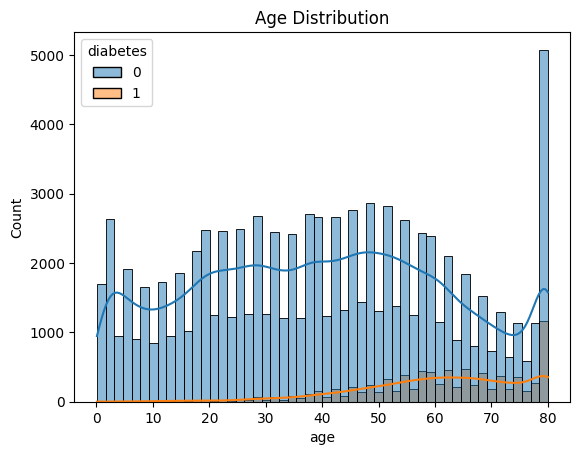

In [23]:
sns.histplot(data = main_df, x = main_df['age'], hue = main_df['diabetes'], kde = True)
plt.title('Age Distribution')
plt.savefig('vis_1.png')

**Data Kategorikal**

Berikut adalah diagram yang menunujukan data kategorikal untuk mempermudah mengambil informasi yang terdapat di dalamnya.

Pada kode dibawah dituliskan `plt.subplots(2, 2, figsize=(7, 7)`, yang berrarti membuatkan kolom tabel dengan ukuran 2x2, dan ukuran 7x7.

Data yang ada dalam tabel di bawah adalah feature "hypertension", "heart_disease", "smoking_history", dan "gender".

Selnajutnya, diagram ini disimpan dengan nama file "vis_2.png" dengan kode `plt.savefig(vis_2.png)`

Dari visualisasi dataset di atas, tidak ada yang terlalu menyebabkan orang terkena diabetes. Memang tingkat orang yang tidak terkena hypertension atau penyakit jantung lebih tinggi tidak terkena diabetes, namun jumlah data yang terkena hypertension atau penyakit jantung lebih sedikit. Begitu juga dengan jenis kelamin dan riwayat merokok.

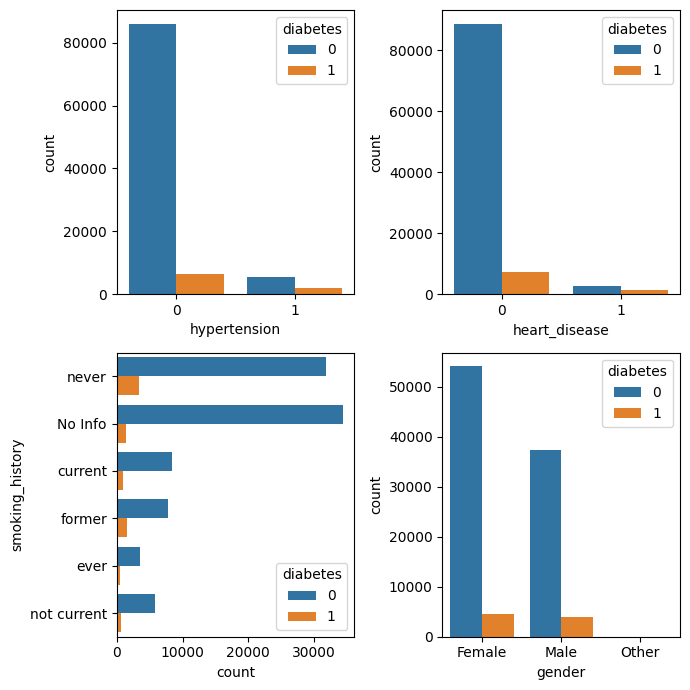

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
sns.countplot(data = main_df, x = 'hypertension', hue = 'diabetes', ax = ax[0, 0])
sns.countplot(data = main_df, x = 'heart_disease', hue = 'diabetes', ax = ax[0, 1])
sns.countplot(data = main_df, y = 'smoking_history', hue = 'diabetes', ax = ax[1, 0])
sns.countplot(data = main_df, x = 'gender', hue = 'diabetes', ax = ax[1, 1])
plt.tight_layout()
plt.savefig('vis_2.png')
plt.show()

Berikut adalah diagram yang menunujukan keterkaitan data kategorikal dengan kolom/feature "gender. Apakah jenis kelamin pasien mempengaruhi kondisi kesehatan pasien?

Pada kode dibawah dituliskan `plt.subplots(1, 3, figsize=(8, 5)`, yang berrarti membuatkan kolom tabel dengan ukuran 1x3, dan ukuran 8x5.

Selanjutnya, diagram ini disimpan dengan nama file "vis_3.png" dengan kode `plt.savefig(vis_3.png)`

Setelah diamati, ternyata jenis kelamin tidak mempengaruhi kondisi apapun pada pasien.

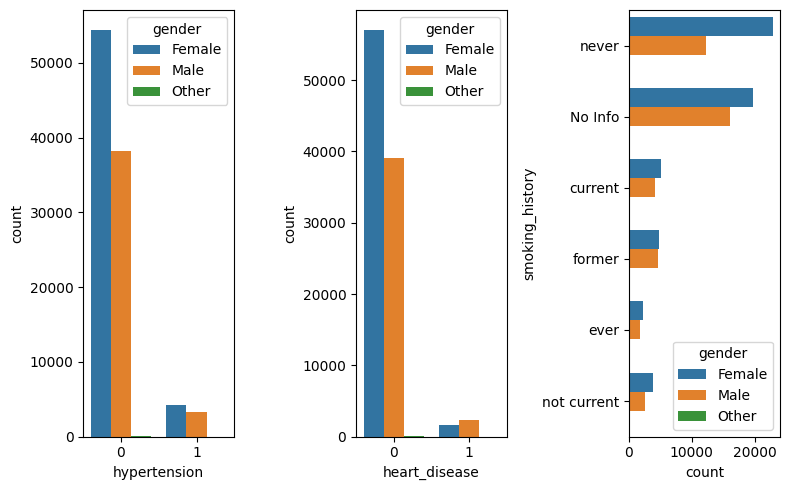

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(8, 5))
sns.countplot(data = main_df, x = 'hypertension', hue = 'gender', ax = ax[0])
sns.countplot(data = main_df, x = 'heart_disease', hue = 'gender', ax = ax[1])
sns.countplot(data = main_df, y = 'smoking_history', hue = 'gender', ax = ax[2])
plt.tight_layout()
plt.savefig('vis_3.png')
plt.show()

**Data Numerical**

Berikut adalah diagram boxplot yang menunujukan data numerical untuk mempermudah mengambil informasi yang terdapat di dalamnya.

Pada kode dibawah dituliskan `plt.subplots(1, 3`, yang berrarti membuatkan kolom tabel dengan ukuran 1x3, dengan ukuran yang diesesuaikan default.

Data yang ada dalam tabel di bawah adalah feature "HbA1c_level", "blood_glucose_level", dan "bmi".

Selanjutnya, diagram ini disimpan dengan nama file "vis_4.png" dengan kode `plt.savefig(vis_4.png)`

Berikut insight yang dapat diambil:
- Orang dengan level Hemoglobin A1c di atas 6.5 dipastikan terkena diabetes. Namun ada beberapa orang dengan level Hemoglobin A1c di bawah 6.5 yang terkena diabetes.
- Orang dengan jumlah glukosa di atas 200 dipastikan terkena diabetes.
- Menurut data yang digunkakan, bmi atau jumlah perkiraan lemak pada tubuh tidak terlalu mempengaruhi diabetes, karena banyak juga pasien dengan bmi di atas 60 yang tidak terkena diabetes.
- Kedua features ini adalah indikasi seseorang terkena diabetes atau tidak.


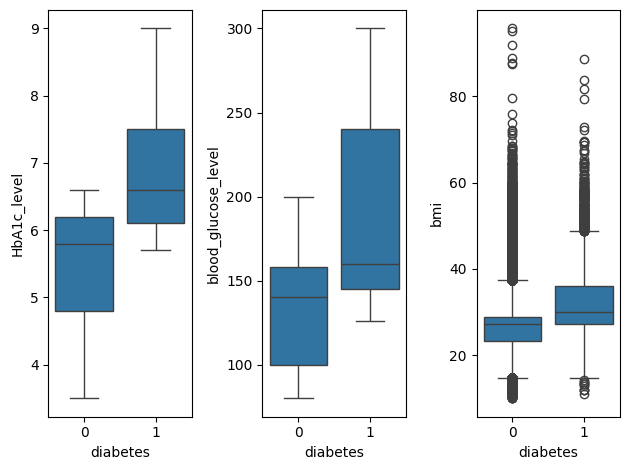

In [26]:
fig, ax = plt.subplots(1, 3)
sns.boxplot(x = main_df.diabetes, y = main_df.HbA1c_level, ax = ax[0])
sns.boxplot(x = main_df.diabetes, y = main_df.blood_glucose_level, ax = ax[1])
sns.boxplot(x = main_df.diabetes, y = main_df.bmi, ax = ax[2])
plt.tight_layout()
plt.savefig('vis_4.png')
plt.show()

## Data Preparation

**Menangani missing data**

Beberapa kesalahan yang ada pada data adalah missing value atau nilai yang tidak ada, dan data yang terduplikasi. Agar tidak menjadi masalah pada saat menggali informasi, atau visualisasi, atau yang lainnya, dapat dilihat dengan menggunakan kode `.isna().sum()` dan `.duplicated().sum()`

In [27]:
main_df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Untuk memastikan, data yang pasien diabetes dan tidak dipisahkan, lalu menghitung jumlah masing-masing. Setelah diketahui bahwa jumlah pasien non diabetes dan pasien diabetes tidak seimbang bahkan jika tanpa data terduplikasi, maka data yang terduplikasi akan dihapus.

In [28]:
main_df.duplicated().sum()

np.int64(3854)

In [29]:
data_non_diabetes = main_df.loc[main_df['diabetes'] == 0]
data_diabetes = main_df.loc[main_df['diabetes'] == 1]
print('Jumlah data non diabetes =', len(data_non_diabetes))
print('Jumlah data diabetes =', len(data_diabetes))
print('Jumlah data duplikasi non diabetes =', data_non_diabetes.duplicated().sum())
print('Jumlah data duplikasi diabetes =', data_diabetes.duplicated().sum())

Jumlah data non diabetes = 91500
Jumlah data diabetes = 8500
Jumlah data duplikasi non diabetes = 3836
Jumlah data duplikasi diabetes = 18


In [30]:
main_df.drop_duplicates(inplace=True)

In [31]:
main_df.duplicated().sum()

np.int64(0)

Karena feature "gender" terdapat 3 kategori (Yang seharusnya hanya 2), mungkin terdapat kategori yang salah.

Setelah dilihat dengan `.value_counts()`, ada kategori "other" dengan jumlah 18 data. Karena ini termasuk kategori yang tidak lazim, seandainya dihapus tidak akan mempengaruhi kualitas data, justru meningkatkan akurasi model, karena berkurang 1 kategori.

Oleh karena itu, hanya fata dengan kategori selain "other" yang akan dipakai. Perintah itu dilaksakan dengan kode `[main_df.gender != 'Other']`.
Jika sudah selesai, isi kategori "gender" dapat dilihat dengan kode `main_df['gender'].unique()`

In [32]:
main_df.gender.value_counts()

,count
gender,
Female,56161
Male,39967
Other,18


In [33]:
main_df = main_df[main_df.gender != 'Other']
main_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

**Mengubah semua menjadi angka**

Feature gender yang merupakan data string diubah menjadi angka dengan memanfaatkan perintah `.astype('category')`, lalu `.cat.codes`. Untuk melihat hasil pengubahannya, kita lihat nilai index `main_df.gender.cat.categories`.

Semua kolom dengan tipe data object/string dihapus menggunakan `.drop()`, lalu menyimpan hasilnya dalam number_df.

In [34]:
main_df['gender'] = main_df['gender'].astype('category')
main_df['gender_code'] = main_df['gender'].cat.codes

In [35]:
print('0 =', main_df.gender.cat.categories[0])
print('1 =', main_df.gender.cat.categories[1])

0 = Female
1 = Male


In [36]:
number_df = main_df.drop(['gender', 'smoking_history'], axis=1)
number_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_code
0,80.0,0,1,25.19,6.6,140,0,0
1,54.0,0,0,27.32,6.6,80,0,0
2,28.0,0,0,27.32,5.7,158,0,1
3,36.0,0,0,23.45,5.0,155,0,0
4,76.0,1,1,20.14,4.8,155,0,1


**Korelasi Antar Data**

Untuk memaksimalkan data yang dimasukan, dipilih kolom/feature yang memang benar-benar menunjukan indikasi diabetes. Berikut adalah langkah yang digunakan:

1. Menggunakan `sns.heatmap(number_df.corr(), annout=True)`, lalu menyimpan hasilnya dengan nama "heatmap_corr.png".
2. Mengambil hanya kolom yang memiliki nilai korelasi di atas 0.19 `corr[abs(corr > 0.19)]`.
3. Mengurutkan nilai korelasi dari yang tertinggi ke yang rendah, yaitu dengan kode `.sort_values(ascending=True)`.
4. Membuat diagram batang sesuai urutan nilai korelasi sebelumnya.
5. Membuat dataframe "final_df" dengan isi 4 feature yang memiliki korelasi dengan feature dibetes di atas 0.19.

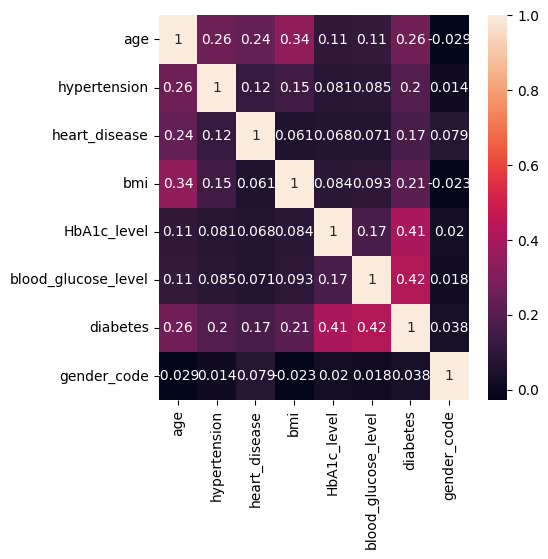

In [37]:
plt.figure(figsize=(5,5))
sns.heatmap(number_df.corr(), annot=True)
plt.show

plt.savefig('heatmap_corr.png')

In [38]:
corr = number_df.corr()['diabetes']. drop('diabetes')
top_features = corr[abs(corr) > 0.19].sort_values(ascending=False)
top_features = list(top_features.index)
top_features

['blood_glucose_level', 'HbA1c_level', 'age', 'bmi', 'hypertension']

Berikut adalah urutan dengan korelasi dari yang terbesar sampai yang terkecil
1. 'blood_glucose_level'
2. 'HbA1c_level'
3. 'age'
4. 'bmi'
5. 'hypertension'

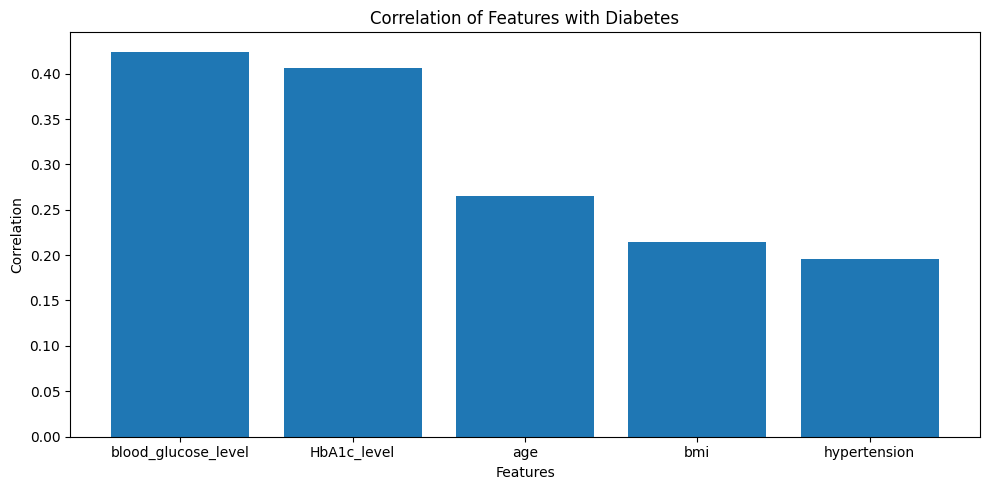

In [39]:
plt.figure(figsize=(10,5))
plt.bar(x=top_features, height=corr[top_features])
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation of Features with Diabetes')
plt.tight_layout()
plt.show()

In [40]:
final_df = main_df[['blood_glucose_level', 'HbA1c_level', 'age', 'bmi', 'diabetes']]
final_df.head()

,blood_glucose_level,HbA1c_level,age,bmi,diabetes
0,140,6.6,80.0,25.19,0
1,80,6.6,54.0,27.32,0
2,158,5.7,28.0,27.32,0
3,155,5.0,36.0,23.45,0
4,155,4.8,76.0,20.14,0


**Membagi Dataset**

Sebelum masuk ke tahap modeling, dataset yang sudah siap dibagi menjadi 2, yaitu label (karakteristik atau atribut data yang untuk membuat prediksi), dan target (hasil atau prediksi yang diinginkan).

Pada proyek ini, karena kita ingin membuat model yang bisa memprediksi diabetes, tentunya data "target" adalah kolom/feature "diabetes", dan lainnya masuk kedalam data label.

In [41]:
label = final_df[['blood_glucose_level', 'HbA1c_level', 'age', 'bmi']].values
target = final_df['diabetes'].values

Selanjutnya, data dibagi menjadi data train dan data testing menggunakan library yang sudah disiapkan. Oleh karena itu, sebelumnya kita import `train_test_split`. `test_size = 0.2` artinya, 20% dari data keseluruhan digunakan sebagai data test, dan 80& sisanya digunakan sebagai data train.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(label, target, test_size = 0.3, random_state=42, stratify=target)

Karena terdapat ketidakseimbangan antara data pasien diabetes dan non-diabetes, data train diambil ulang menggunakan teknik SMOTE dan Undersampling. Lalu menampilkan perbandingan hasilnya melalui perintah `print()`

In [43]:
from imblearn.combine import SMOTETomek, SMOTEENN

In [44]:
smote_tomek = SMOTETomek(random_state=42)

X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

print("Distribusi setelah SMOTE-Tomek:")
print("Non-diabetes:", sum(y_train_resampled == 0))
print("Diabetes:", sum(y_train_resampled == 1))


Distribusi setelah SMOTE-Tomek:
Non-diabetes: 60576
Diabetes: 60576


## Modeling

**Import Library**

Untuk membuat model, tentu perlu import model yang ingin digunakan dan beberapa library tambahan.

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Melatih Model**

Setelah *import* model yang akan digunakan, model dimasukan kedalam *dictionary* "model", lalu menggunakan *looping* untuk melatih 2 model bersamaan sekaligus menampilkan hasil dari model yang dilatih.

In [46]:
models={'Decision Tree':DecisionTreeClassifier(),
        'Gradient Boosting':GradientBoostingClassifier()
        }

Betrikut adalah kode *looping for* untuk melatih dengan `model.fit()`, lalu menampilkan hasilnya dengan `classification_report`.

In [47]:
for name, model in models.items():
    print(name)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26294
           1       0.71      0.73      0.72      2545

    accuracy                           0.95     28839
   macro avg       0.84      0.85      0.85     28839
weighted avg       0.95      0.95      0.95     28839

Gradient Boosting
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26294
           1       0.99      0.67      0.80      2545

    accuracy                           0.97     28839
   macro avg       0.98      0.84      0.89     28839
weighted avg       0.97      0.97      0.97     28839



Berikut adalah perintah untuk melakukan hyperparameter tuning. Di sini akan dibuat 2, yaitu untuk model Decion Tree dan Gradient Boosting.

Berikut penjelasan dictionary param_distributions yang mendefinisikan hyperparameter yang akan dicoba.
- `max_depth`:
Membatasi kedalaman maksimum pohon untuk mencegah overfitting
- `min_samples_split`:
Jumlah minimum sampel yang dibutuhkan untuk membagi sebuah node
- `min_samples_leaf`:
Jumlah minimum sampel yang harus ada di setiap daun:
- `criterion`:
Fungsi untuk mengukur kualitas split.

Selanjutnya, proses pencarian kombinasi hyperparameter terbaik melalui RandomizedSearchCV:
- `estimator`:
Model yang akan dituning, dalam hal ini adalah DecisionTreeClassifier.
- `param_distributions`:
Distribusi hyperparameter yang akan dipilih secara acak.
- `n_iter`:
Jumlah kombinasi hyperparameter yang akan diuji (10 kombinasi acak).
- `cv=5`:
Dataset dilatih dan divalidasi menggunakan 5-fold cross-validation.
- `scoring='f1_macro'`:
Metrik evaluasi yang cocok untuk klasifikasi multikelas atau dataset yang tidak seimbang.
- `n_jobs=-1`:
Menjalankan pencarian secara paralel di semua prosesor yang tersedia untuk mempercepat proses.
- `random_state=42`:
Menentukan seed untuk pengacakan, sehingga hasil dapat direproduksi.

Terakhir yaitu melakukan iterasi melalui kombinasi hyperparameter acak yang diambil dari param_distributions dengan perintah `.fit()`.
Ditutup dengan menampilkan parameter terbaik dengan perintah `print()` .

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform

In [49]:
param_distributions_0 = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

random_search_0 = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_distributions_0,
    n_iter=10,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)

random_search_0.fit(X_train, y_train)

print("Best parameters for Decision Tree:", random_search_0.best_params_)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 13}


In [50]:
best_model_random_0 = random_search_0.best_estimator_
y_pred_best_random_0 = best_model_random_0.predict(X_test)
accuracy_best_random_0 = accuracy_score(y_test, y_pred_best_random_0)

In [51]:
param_distributions_1 = {
    'n_estimators': randint(10, 15),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.6, 0.4)
}

random_search_1 = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=param_distributions_1,
    n_iter=10,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)

random_search_1.fit(X_train, y_train)

print("Best parameters for Decision Tree:", random_search_1.best_params_)

Best parameters for Decision Tree: {'learning_rate': np.float64(0.3009729556485983), 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 13, 'subsample': np.float64(0.6733618039413735)}


In [52]:
best_model_random_1 = random_search_1.best_estimator_
y_pred_best_random_1 = best_model_random_1.predict(X_test)
accuracy_best_random_1 = accuracy_score(y_test, y_pred_best_random_1)

## Akurasi

**Cek Akurasi Model**

Langkah terakhir adalah dengan melihat laporan hasil dari model yang telah dibuat. Di bawah akan dibuatkan 2, yaitu:
1. Laporan yang menampilkan *precision, recall, dan f-1score* menggunakan kode `classification_report`.
2. Membuat heatmap yang menampilkan jumlah data yang diprediksi dengan benar dan salah menggunakan `confusion_matrix`, lalu menyimpannya kedalam gambar dengan perintah `.savefig()`

In [53]:
print('DecisionTreeClassifier + RandomizedSearchCV')
print(classification_report(y_test, y_pred_best_random_0))
print('GradientBoostingClassifier + RandomizedSearchCV')
print(classification_report(y_test, y_pred_best_random_1))

DecisionTreeClassifier + RandomizedSearchCV
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26294
           1       1.00      0.67      0.80      2545

    accuracy                           0.97     28839
   macro avg       0.98      0.83      0.89     28839
weighted avg       0.97      0.97      0.97     28839

GradientBoostingClassifier + RandomizedSearchCV
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26294
           1       0.99      0.67      0.80      2545

    accuracy                           0.97     28839
   macro avg       0.98      0.84      0.89     28839
weighted avg       0.97      0.97      0.97     28839



Berikut penjelasan pembuatan confusion matrix dari hasil model:
- Membuat figur (canvas) dan axes (area plot) dengan 5x5 inci.
- Fungsi untuk menghitung Confusion Matrix berdasarkan nilai sebenarnya (y_test) dan prediksi model (y_pred_best_random).
- Memvisualisasikan dalam bentuk heatmap dengan `sns.heatmap()`
- Menampilkan angka di setiap cell menggunakan `annot=True`, dengan format angka menggunakan `fmt=".0f"`
- Sumbu x diberi label dengan `xlabel("y_head")`, dan sumbu y diberi label dengan `.y_label("y_true")
- Menyimpan hasilnya sebagai gambar dengan nama "confusion_matrix.png"

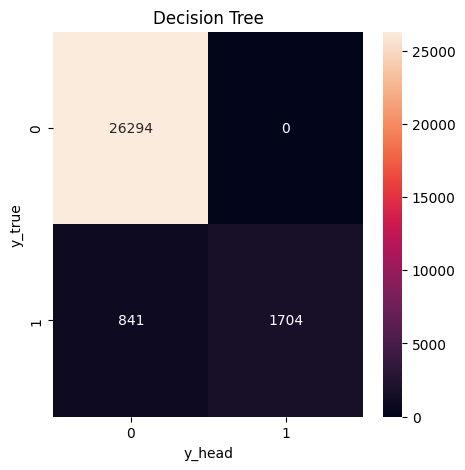

In [54]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_best_random_0), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.title("Decision Tree")
plt.savefig('confusion_matrix_0.png')
plt.show()

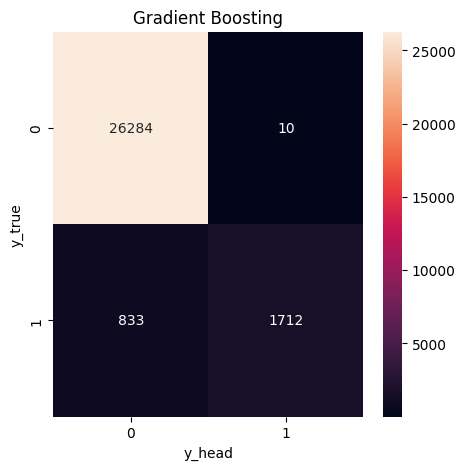

In [55]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_best_random_1), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.title("Gradient Boosting")
plt.savefig('confusion_matrix_1.png')
plt.show()

**Menyimpan Model**

Langkah pertama yaitu import library (di sini menggunakan `pickle`). Selanjutnya, membuka file dengan nama "model.pkl" dalam mode *write binary*, dan mengubah model menjadi byte-stream dengan perintah `pickle.dump()`. Terakhir, model ini akan tersimpan dalam file "model.pkl".

In [56]:
import pickle
pickle.dump(random_search_1, open('model.pkl', 'wb'))